In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

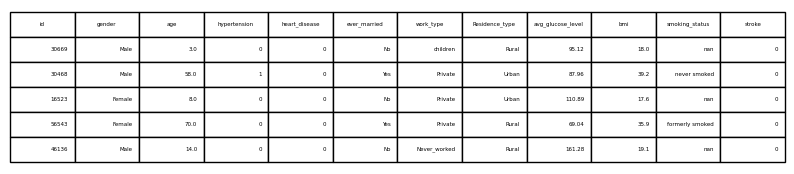

In [9]:
# Read the CSV file
data = pd.read_csv('dataset.csv')
df=data
df.head()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Save the first few lines of the dataset as a PNG
fig, ax = plt.subplots(figsize=(10, 2))  
ax.axis('off')
tbl = ax.table(cellText=first_few_lines.values, colLabels=first_few_lines.columns, loc='center')
tbl.scale(1, 1.5)

output_path = 'first_few_lines_dataset_smote1.png'
plt.savefig(output_path, bbox_inches='tight', dpi=300)



In [11]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [14]:
# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df = df.drop(['work_type', 'id'], axis=1)

In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41938 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             41938 non-null  int64  
 1   age                41938 non-null  float64
 2   hypertension       41938 non-null  int64  
 3   heart_disease      41938 non-null  int64  
 4   ever_married       41938 non-null  int64  
 5   Residence_type     41938 non-null  int64  
 6   avg_glucose_level  41938 non-null  float64
 7   bmi                41938 non-null  float64
 8   smoking_status     41938 non-null  int64  
 9   stroke             41938 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.5 MB


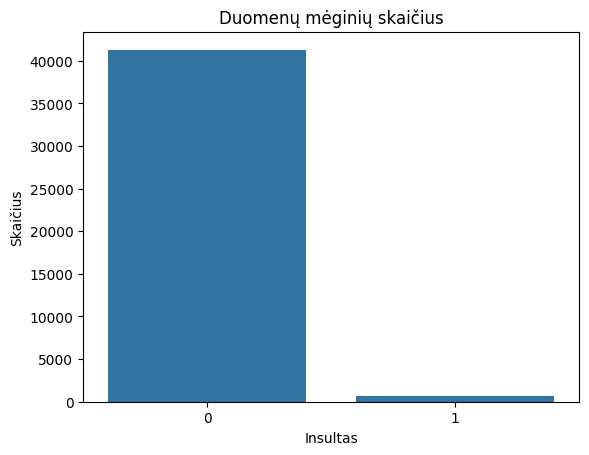

In [16]:
sns.countplot(x = 'stroke', data = df)
plt.title("Duomenų mėginių skaičius")
plt.ylabel("Skaičius")
plt.xlabel("Insultas")
plt.show()

In [17]:
#splitting the data into features and class labels.
X = df.drop(['stroke'],axis = 1)
Y = df['stroke']
counts = Y.value_counts()

# Calculate the percentage of each class
percentages = Y.value_counts(normalize=True) * 100

print("Counts of each class:")
print(counts)

print("\nPercentages of each class:")
print(percentages)

Counts of each class:
stroke
0    41295
1      643
Name: count, dtype: int64

Percentages of each class:
stroke
0    98.466784
1     1.533216
Name: proportion, dtype: float64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
train_distribution = Y_train.value_counts() 
print("Training Set Distribution:\n", train_distribution)

test_distribution = Y_test.value_counts() 
print("Testing Set Distribution:\n", test_distribution)

Training Set Distribution:
 stroke
0    28894
1      462
Name: count, dtype: int64
Testing Set Distribution:
 stroke
0    12401
1      181
Name: count, dtype: int64


In [20]:
# 4. Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, Y_train)

# 6. Make predictions
Y_pred = mlp.predict(X_test)

c:\Users\gabij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

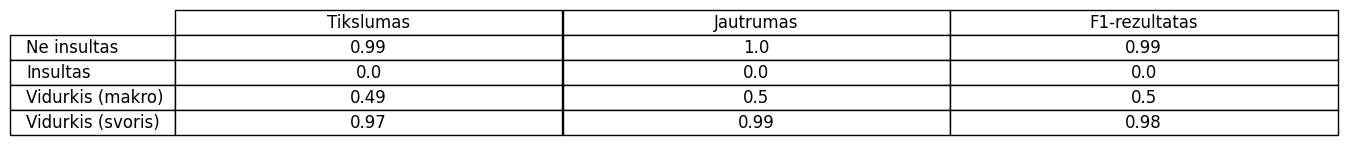

In [22]:
classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])

# Translate
classification_df.rename(columns={
    'precision': 'Tikslumas',
    'recall': 'Jautrumas',
    'f1-score': 'F1-rezultatas',
    'support': 'Pavyzdžių skaičius'
}, inplace=True)

classification_df.rename(index={
    '0': 'Ne insultas',
    '1': 'Insultas',
    'macro avg': 'Vidurkis (makro)',
    'weighted avg': 'Vidurkis (svoris)'
}, inplace=True)

classification_df = classification_df.round(2)

# Table
fig, ax = plt.subplots(figsize=(10, 1))  

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = plt.table(cellText=classification_df.values, colLabels=classification_df.columns, 
                rowLabels=classification_df.index, cellLoc='center', loc='center')

tbl.scale(1.5, 1.5) 
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Save the table as a PNG file
plt.savefig('klasifikavimo_ataskaita.png', bbox_inches='tight', dpi=300)

plt.show()




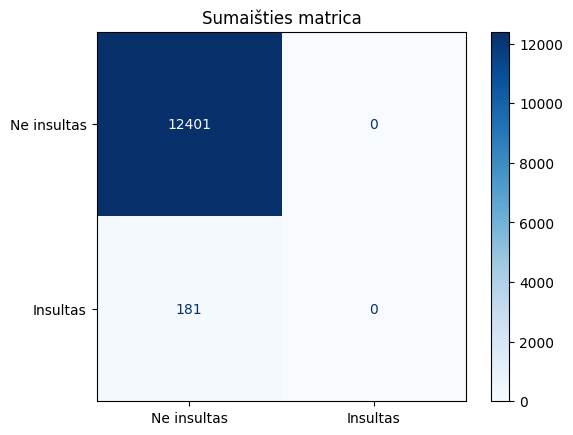

In [23]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ne insultas', 'Insultas'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Sumaišties matrica')
plt.ylabel("")
plt.xlabel("")
plt.show()

In [24]:
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


# Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

c:\Users\gabij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=7)

In [26]:
# Make predictions
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("MLP Classifier Accuracy after SMOTE:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

MLP Classifier Accuracy after SMOTE:
Training Accuracy: 0.9357602085143354
Testing Accuracy: 0.8643299952312827


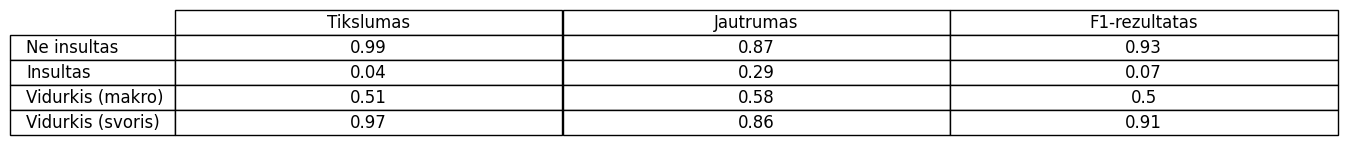

In [27]:
classification_rep = classification_report(y_test, test_preds, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])

# Translate
classification_df.rename(columns={
    'precision': 'Tikslumas',
    'recall': 'Jautrumas',
    'f1-score': 'F1-rezultatas',
    'support': 'Pavyzdžių skaičius'
}, inplace=True)

classification_df.rename(index={
    '0': 'Ne insultas',
    '1': 'Insultas',
    'macro avg': 'Vidurkis (makro)',
    'weighted avg': 'Vidurkis (svoris)'
}, inplace=True)

# Round the values to 2 decimal places
classification_df = classification_df.round(2)

# Table
fig, ax = plt.subplots(figsize=(10, 1))  

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = plt.table(cellText=classification_df.values, colLabels=classification_df.columns, 
                rowLabels=classification_df.index, cellLoc='center', loc='center')

tbl.scale(1.5, 1.5) 
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Save the table as a PNG file
plt.savefig('klasifikavimo_ataskaita.png', bbox_inches='tight', dpi=300)

plt.show()




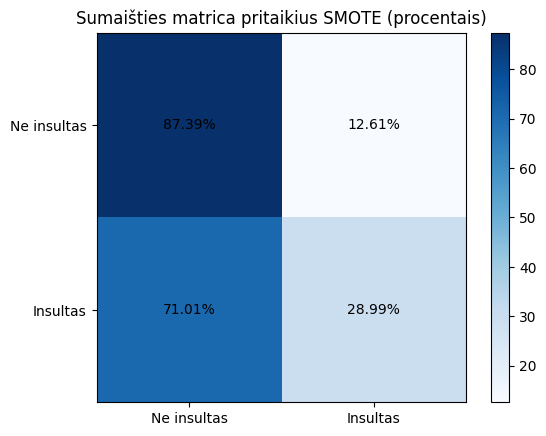

In [30]:
# Generate the SMOTE confusion matrix
cm = confusion_matrix(y_test, test_preds)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius SMOTE (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])

ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')


plt.show()

In [31]:
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9857234)

adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


# Train the MLP model on resampled data with adasyn
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)
mlp.fit(X_train_resampled, y_train_resampled)


c:\Users\gabij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)

In [33]:
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("MLP Classifier Accuracy after ADASYN:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

MLP Classifier Accuracy after ADASYN:
Training Accuracy: 0.9379818042919648
Testing Accuracy: 0.8605945000794786


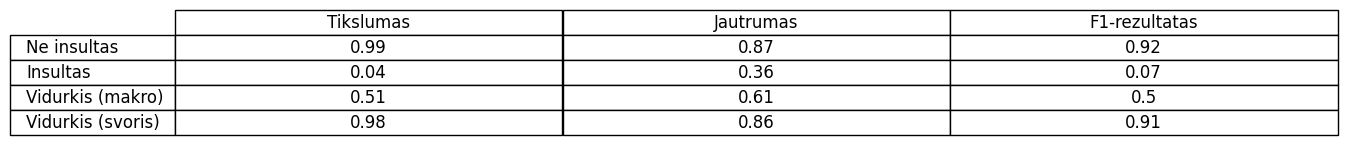

In [34]:
classification_rep = classification_report(y_test, test_preds, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])

# Translate
classification_df.rename(columns={
    'precision': 'Tikslumas',
    'recall': 'Jautrumas',
    'f1-score': 'F1-rezultatas',
    'support': 'Pavyzdžių skaičius'
}, inplace=True)

classification_df.rename(index={
    '0': 'Ne insultas',
    '1': 'Insultas',
    'macro avg': 'Vidurkis (makro)',
    'weighted avg': 'Vidurkis (svoris)'
}, inplace=True)

# Round the values to 2 decimal places
classification_df = classification_df.round(2)

# Table
fig, ax = plt.subplots(figsize=(10, 1))  

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = plt.table(cellText=classification_df.values, colLabels=classification_df.columns, 
                rowLabels=classification_df.index, cellLoc='center', loc='center')

tbl.scale(1.5, 1.5) 
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Save the table as a PNG file
plt.savefig('adasyn_klasifikavimo_ataskaita.png', bbox_inches='tight', dpi=300)

plt.show()




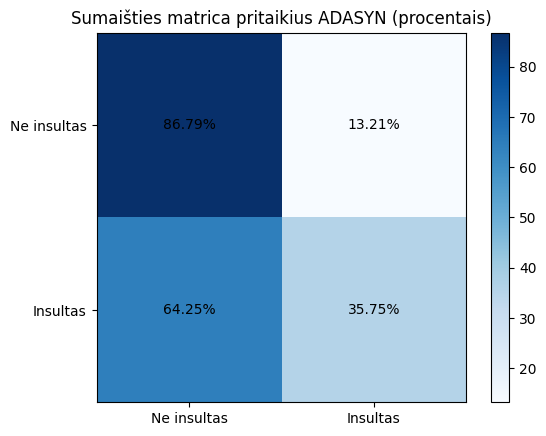

In [35]:

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius ADASYN (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2)) 
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])

ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')


plt.show()


In [38]:
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Apply Tomek Links to handle class imbalance
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


# Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=1000)
mlp.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=1000)

In [39]:
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("MLP Classifier Accuracy after Tomek:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

MLP Classifier Accuracy after Tomek:
Training Accuracy: 0.98771785371209
Testing Accuracy: 0.9813225242409792


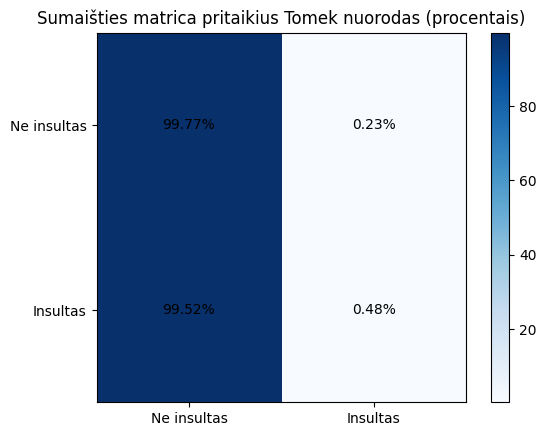

In [40]:
# Generate and display the Tomek links confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius Tomek nuorodas (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])

ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')



plt.show()


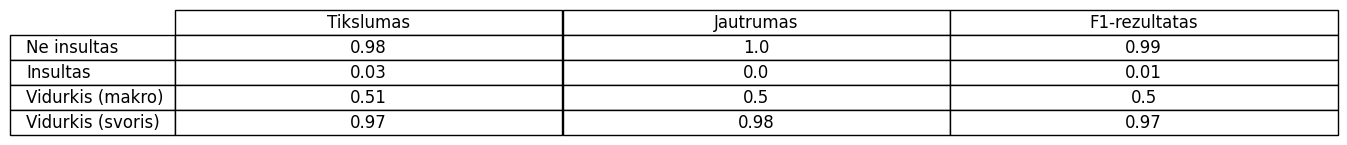

In [41]:
classification_rep = classification_report(y_test, test_preds, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])
# Translate
classification_df.rename(columns={
    'precision': 'Tikslumas',
    'recall': 'Jautrumas',
    'f1-score': 'F1-rezultatas',
    'support': 'Pavyzdžių skaičius'
}, inplace=True)

classification_df.rename(index={
    '0': 'Ne insultas',
    '1': 'Insultas',
    'macro avg': 'Vidurkis (makro)',
    'weighted avg': 'Vidurkis (svoris)'
}, inplace=True)

# Round the values to 2 decimal places
classification_df = classification_df.round(2)

# Table
fig, ax = plt.subplots(figsize=(10, 1))  

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = plt.table(cellText=classification_df.values, colLabels=classification_df.columns, 
                rowLabels=classification_df.index, cellLoc='center', loc='center')

tbl.scale(1.5, 1.5) 
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Save the table as a PNG file
plt.savefig('tomek_klasifikavimo_ataskaita.png', bbox_inches='tight', dpi=300)

plt.show()




In [44]:
# SMOTE and Tomek
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4294111295)

# Apply SMOTE + Tomek Links to handle class imbalance
smote_tomek = SMOTETomek(tomek=TomekLinks())
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# 3. Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 4. Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=4294111295)
mlp.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300,
              random_state=4294111295)

In [45]:
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("MLP Classifier Accuracy after SMOTE and Tomek:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

MLP Classifier Accuracy after SMOTE and Tomek:
Training Accuracy: 0.9266742849227786
Testing Accuracy: 0.8442219043077412


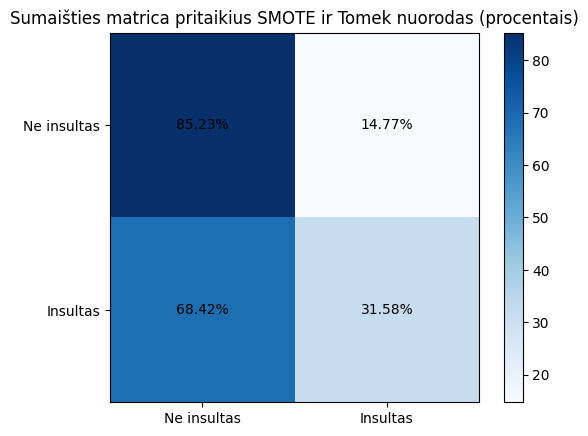

In [46]:
# Generate the SMOTE and Tomek confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius SMOTE ir Tomek nuorodas (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')


plt.show()


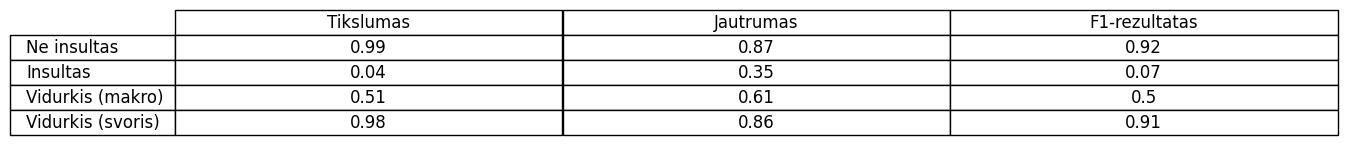

In [54]:
classification_rep = classification_report(y_test, test_preds, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])

# Translate
classification_df.rename(columns={
    'precision': 'Tikslumas',
    'recall': 'Jautrumas',
    'f1-score': 'F1-rezultatas',
    'support': 'Pavyzdžių skaičius'
}, inplace=True)

classification_df.rename(index={
    '0': 'Ne insultas',
    '1': 'Insultas',
    'macro avg': 'Vidurkis (makro)',
    'weighted avg': 'Vidurkis (svoris)'
}, inplace=True)

# Round the values to 2 decimal places
classification_df = classification_df.round(2)

# Table
fig, ax = plt.subplots(figsize=(10, 1))  

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = plt.table(cellText=classification_df.values, colLabels=classification_df.columns, 
                rowLabels=classification_df.index, cellLoc='center', loc='center')

tbl.scale(1.5, 1.5) 
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Save the table as a PNG file
plt.savefig('smote_tomek_klasifikavimo_ataskaita.png', bbox_inches='tight', dpi=300)

plt.show()

In [48]:
X = df.drop(columns=['stroke'])  
y = df['stroke']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9857234)

# Apply ADASYN to handle class imbalance (oversampling)
adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links to clean the resampled data (undersampling)
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train_resampled, y_train_resampled)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model on the resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)
mlp.fit(X_train_resampled, y_train_resampled)

c:\Users\gabij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)

In [49]:
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("MLP Classifier Accuracy after SMOTE:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

MLP Classifier Accuracy after SMOTE:
Training Accuracy: 0.9374695948293835
Testing Accuracy: 0.8596407566364648


C:\Users\gabij\AppData\Local\Temp\ipykernel_17060\3312359793.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Ne insultas', 'Insultas'])


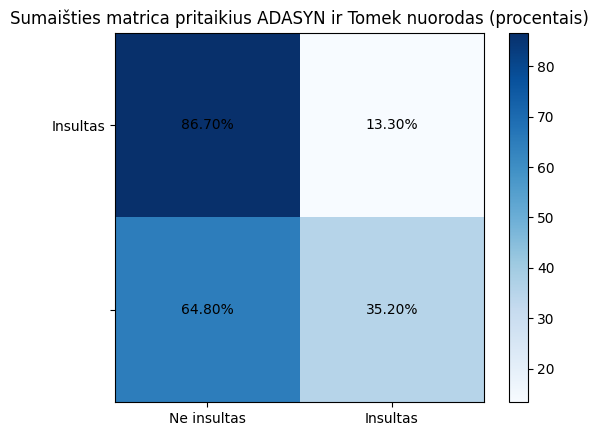

In [50]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius ADASYN ir Tomek nuorodas (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')


plt.show()

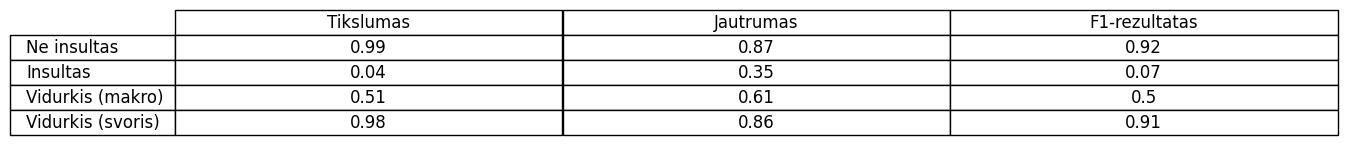

In [53]:
classification_rep = classification_report(y_test, test_preds, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])

# Translate
classification_df.rename(columns={
    'precision': 'Tikslumas',
    'recall': 'Jautrumas',
    'f1-score': 'F1-rezultatas',
    'support': 'Pavyzdžių skaičius'
}, inplace=True)

classification_df.rename(index={
    '0': 'Ne insultas',
    '1': 'Insultas',
    'macro avg': 'Vidurkis (makro)',
    'weighted avg': 'Vidurkis (svoris)'
}, inplace=True)

# Round the values to 2 decimal places
classification_df = classification_df.round(2)

# Table
fig, ax = plt.subplots(figsize=(10, 1))  

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = plt.table(cellText=classification_df.values, colLabels=classification_df.columns, 
                rowLabels=classification_df.index, cellLoc='center', loc='center')

tbl.scale(1.5, 1.5) 
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Save the table as a PNG file
plt.savefig('adasyn_tomek_klasifikavimo_ataskaita.png', bbox_inches='tight', dpi=300)

plt.show()